# Importing libiraries

In [19]:
from numpy import *
from pandas import *
from matplotlib import pyplot as plt
import seaborn as snp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading The Data

In [20]:
loan_data=read_csv(r'C:\Users\DELL\Documents\loan_status.csv')

In [21]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
loan_data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
# Ordinal Encoding
LE=LabelEncoder()
loan_data["Gender"]=LE.fit_transform(loan_data["Gender"])
loan_data["Married"]=LE.fit_transform(loan_data["Married"])
loan_data["Education"]=LE.fit_transform(loan_data["Education"])
loan_data["Self_Employed"]=LE.fit_transform(loan_data["Self_Employed"])
loan_data["Loan_Status"]=LE.fit_transform(loan_data["Loan_Status"])
loan_data["Dependents"]=LE.fit_transform(loan_data["Dependents"])

In [26]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [27]:
loan_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [28]:
loan_data=loan_data.drop(columns=["Property_Area","Loan_ID"])  #Dropping unrequired data

In [29]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1


In [30]:
loan_data.shape

(614, 11)

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [32]:
 loan_data.isnull().sum()  #Finding null values

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [33]:
#Cleaning the Data
SI=SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, copy=True) 

In [34]:
loan_data=SI.fit_transform(loan_data)

In [35]:
loan_data

array([[  1.,   0.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   0.,   0.]])

In [36]:
loan_data.shape

(614, 11)

In [37]:
X=loan_data[:,:-1]

In [38]:
y=loan_data[:,-1]

In [39]:
X.shape

(614, 10)

In [40]:
y.shape

(614,)

In [41]:
#Splitting The Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(491, 10)

In [43]:
y_test.shape

(123,)

# Building The model

In [44]:
# Support Vector Machine Model
SVCModel = SVC(kernel= 'rbf',
               max_iter=1000,C=1,gamma='auto')

In [45]:
SVCModel.fit(X_train, y_train)    #Training The model

SVC(C=1, gamma='auto', max_iter=1000)

In [46]:
SVCModel.score(X_train, y_train)    #Checking the model

1.0

In [47]:
SVCModel.score(X_test, y_test)   # Overfitting problem

0.6585365853658537

In [48]:
y_pre=SVCModel.predict(X_test)  #Using model for prediction

In [49]:
y_pre[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [51]:
cm=confusion_matrix(y_test,y_pre)

<AxesSubplot:>

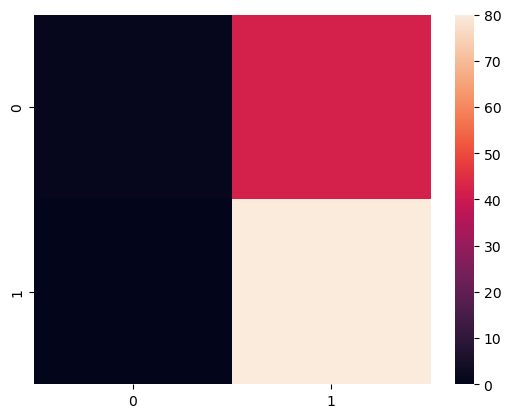

In [52]:
snp.heatmap(cm)

# Classification Using Decision Tree

In [53]:
#Building the model
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=3,
                                                     random_state=33)

In [54]:
DecisionTreeClassifierModel.fit(X_train, y_train)   #Training the model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)

In [55]:
DecisionTreeClassifierModel.score(X_train, y_train)   #Checking the model

0.8207739307535642

In [56]:
DecisionTreeClassifierModel.score(X_test, y_test)

0.7886178861788617

In [57]:
y_pre1=DecisionTreeClassifierModel.predict(X_test)  #Using model for prediction

In [58]:
cm1=confusion_matrix(y_pre1,y_test)

<AxesSubplot:>

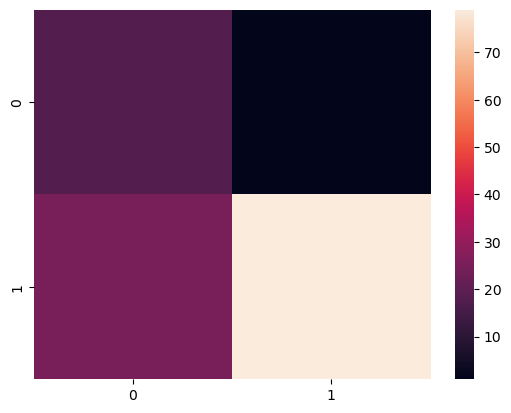

In [59]:
snp.heatmap(cm1)

# Random Forest Classifier Model

In [60]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy',n_estimators=100,
                                  max_depth=3,random_state=33) #criterion can be also : entropy 

In [61]:
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=33)

In [62]:
RandomForestClassifierModel.score(X_train, y_train)

0.8187372708757638

In [63]:
RandomForestClassifierModel.score(X_test, y_test)

0.7886178861788617

In [64]:
y_pre2=RandomForestClassifierModel.predict(X_test)  #Using model for prediction

In [65]:
cm2=confusion_matrix(y_pre2,y_test)

<AxesSubplot:>

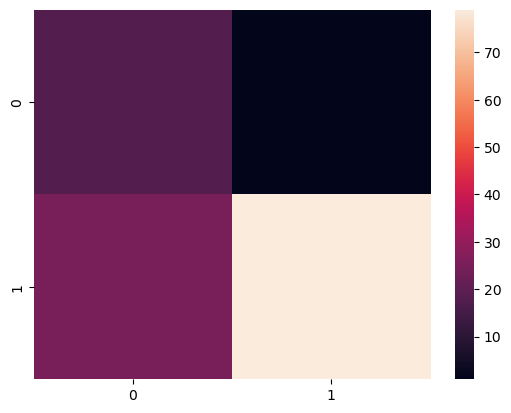

In [66]:
snp.heatmap(cm2)